In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

In [10]:
df_jpm = pd.read_csv ('df_jpm.csv')

In [11]:
df_jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MktRF,SMB,HML,RF,RMW,CMA,SMB_5,yest_close,stock_return,log_return
0,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,0.10,0.10,0.83,0.001,-1.34,-0.65,0.14,55.047691,0.038599,0.000000
1,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.33,-0.32,-0.30,0.001,0.39,-0.01,-0.31,57.172466,-0.010150,-0.010202
2,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,0.75,0.90,-0.30,0.001,-0.39,-0.38,0.84,56.592175,0.001893,0.001891
3,2016-05-23,63.450001,63.869999,63.160000,63.459999,56.654667,9347500,-0.18,0.26,-0.32,0.001,-0.21,0.08,0.24,56.699303,-0.000787,-0.000788
4,2016-05-24,63.939999,64.769997,63.810001,64.540001,57.618855,13839400,1.43,0.68,-0.34,0.001,-0.10,-0.39,0.61,56.654667,0.017019,0.016875


In [12]:
df_jpm.shape

(995, 17)

Variance------------- [[5.1707383e-05]]
Standard Deviation--- [[0.00719078]]
R Square------------- [[0.84496643]]
Adjusted R Square---- [[0.84449711]]
P value------------- [[1.11022302e-16]]


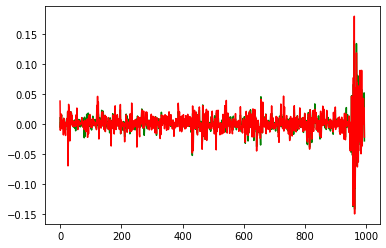

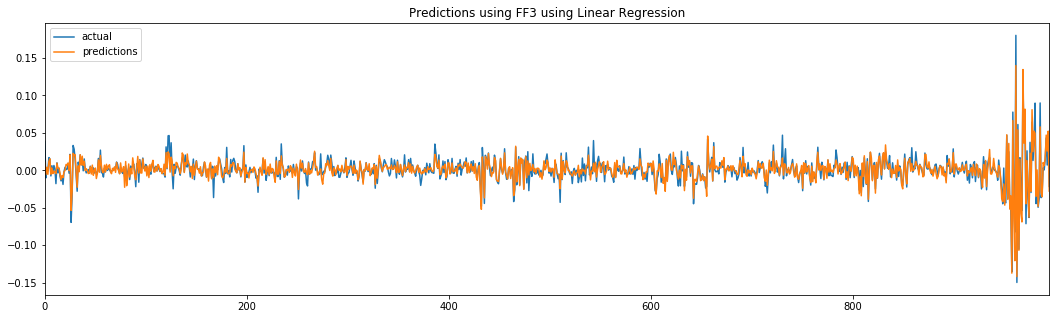

In [14]:
df_jpm['stock_return'] = (df_jpm['Adj Close']-df_jpm['yest_close'])/(df_jpm['yest_close'])

T = df_jpm.shape[0]
Y = df_jpm['stock_return'].values
columns = ['MktRF','SMB','HML']
X=df_jpm[columns]
X = np.column_stack([np.ones((len(X),1)),X])
N = X.shape
Y=np.asarray(Y)
Y = Y.reshape(995,1)

'OLS REGRESSION STARTS'
'Linear Regression of Y: T x 1 on'
'Regressors X: T x N'
invXX = np.linalg.inv(X.transpose()@X)

'OLS estimates for coefficients: X x 1'
beta_hat = invXX@X.transpose()@Y

'Predictive value of Y using OLS'
y_hat = X@beta_hat

'Residuals from OLS'
residuals = Y - y_hat

'Variance of residuals'
variance = (1/T)*residuals.transpose()@residuals

'standard deviation of Y or residuals'
standard_deviation = np.sqrt(variance)

'variance-covariance matrix of beta_hat'
varcov_beta_hat = (variance)*invXX
std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))

'Calculate R-square'
R_square = 1- (residuals.transpose()@residuals)/(T*np.var(Y))
adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])

'Test Each Coefficient: beta_i'
'Null Hypothesis: beta_i = 0'
t_stat = (beta_hat.transpose()-0)/std_beta_hat
p_val_t = 1-ss.norm.cdf(t_stat)

'Test of Joint Significance of Model'
F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/\
         (residuals.transpose()@residuals/(T-N[1]))
p_val_F = 1-ss.f.cdf(F_stat,N[1]-1,T-N[1])

print('Variance-------------',variance)
print('Standard Deviation---',standard_deviation)
print('R Square-------------',R_square)
print('Adjusted R Square----',adj_R_square)
print('P value-------------',p_val_F)
plt.plot(y_hat, color='green')
plt.plot(Y, color = 'red')
plt.show()

pred = pd.DataFrame(y_hat)
act = pd.DataFrame(Y)

plot_df = pd.DataFrame({"actual": act[0], "predictions": pred[0]})
plot_df.plot(figsize=(18, 5), title='Predictions using FF3 using Linear Regression')



In [18]:
mse = mean_squared_error(Y,y_hat)
rmse = np.sqrt(mse)
print('RMSE-------',rmse)
print('R-Squared--',r2_score(Y,y_hat))

RMSE------- 0.007190784591796655
R-Squared-- 0.8449664305469676
